<a href="https://colab.research.google.com/github/Bhanuprasadh/FMML-Assignment-Labs/blob/main/Module_5_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4

# Classification II : Ensemble Methods and Random Forests

```
Module Coordinator : Arohi Srivastav
```

RECAP:
In the last lab, we learnt:

- Gini Index.
- The curse of overfitting and a way to fix it.

In this lab:

- Random Forests as a method to prevent overfitting.

![](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)

## Understanding the motive and idea behind random forests

A critical point for good machine learning models is the ability to generalise well and not simply memorise the training data. Unfortunately, we were witness to the ablity of Decision Trees to perfectly adapt to the training data in the last lab. As we know, this is called *overfitting* and this happens when we have a flexible model (strong learner) that memorizes the training data by fitting it closely.  Such a model is said to have a high variance because the learned parameters will change fastly and considerably with the training data.

The **random forest** is a model made up of many decision trees. 

- When training, each tree in a random foreest learns from a random pample of the data points. This is called as bootstrapping. Same samples can be used in training of multiple decision trees since the sampling is done with replacement.
This is a simple yet elegant method to reduce variance of our model and prevent from increasing unneeded bias.

- While testing, we make predicitions by averaging the predictions of each decision tree. In case of a classification task, we simply that that category that has the highest number of votes. 

This entire process is called as **bagging**. (short for Bootstrap Aggregating)

In [ ]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


In [ ]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1, drawTree = (8,6)):
  #Importing the Decision tree classifier from sklearn:

  clf = RandomForestClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    random_state = 0,\
                                    n_estimators = 10
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the Random Forest on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("The confusion matrix is : ")
  
  fig, ax = plt.subplots(figsize=(3, 3))
  plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names, ax=ax)
  plt.show()

  if drawTree:
    print("Here is a diagram of the tree created to evaluate each sample:")
    fig, ax = plt.subplots(figsize=drawTree)
    imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 10)
    plt.show()

def returnAccuracy(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  clf = RandomForestClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    random_state = 0,\
                                    n_estimators = 10, \
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  return accuracy_score(y_pred, y_test)

def returnAccuracyDT(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  return accuracy_score(y_pred, y_test)

def returnAccuracySvm(trainSet : tuple, testSet : tuple):
  clf = svm.LinearSVC()
                                    
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  return accuracy_score(y_pred, y_test)

def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.show()

In [ ]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

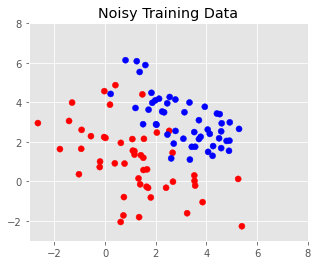

(-3.0, 8.0)

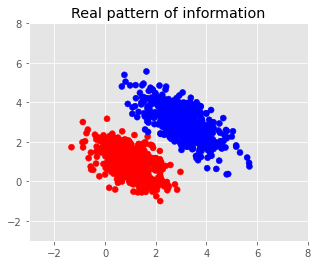

In [ ]:
plt.figure(figsize=(5,4))
plt.style.use("ggplot")
plt.scatter(ar[:, 0], ar[:, 1], c = np.array(["r"] * int((ar.shape[0]/2)) + ["b"] * int((ar.shape[0]/2))), )
plt.title("Noisy Training Data")
plt.xlim((-3, 8))
plt.ylim((-3, 8))

plt.show()

plt.figure(figsize=(5,4))
plt.title("Real pattern of information")
plt.scatter(testAr[:, 0], testAr[:, 1], c = np.array(["r"] * int((testAr.shape[0]/2)) + ["b"] * int((testAr.shape[0]/2))), )

plt.xlim((-3, 8))
plt.ylim((-3, 8))

Depth = 1


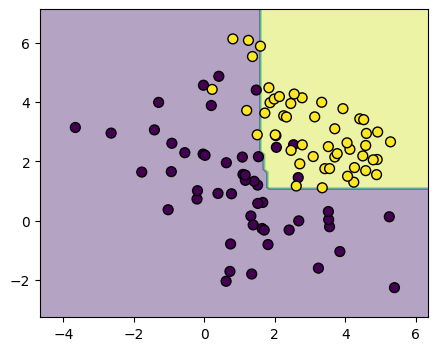

Depth = 2


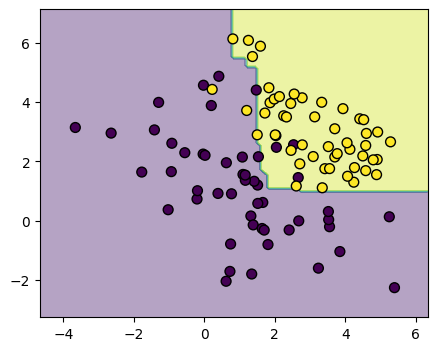

Depth = 4


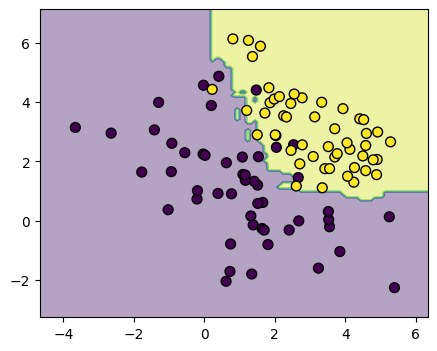

Depth = 8


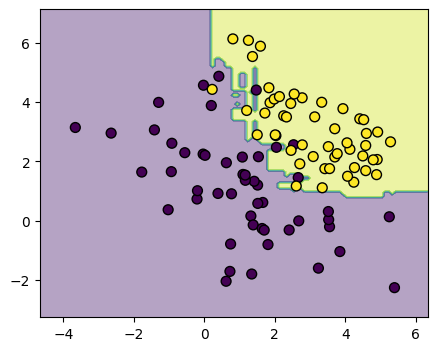

In [ ]:
plt.style.use("default")
X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def boundaryExp(d) :
  clf = RandomForestClassifier(random_state = 0, max_depth = d)
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  print("Depth = {}".format(d))
  plotDecisionBoundary(X, y, pair, clf)
  plt.show()


_ = [boundaryExp(i) for i in [1, 2, 4, 8]]

Text(0.5, 0, 'Depth of the tree')

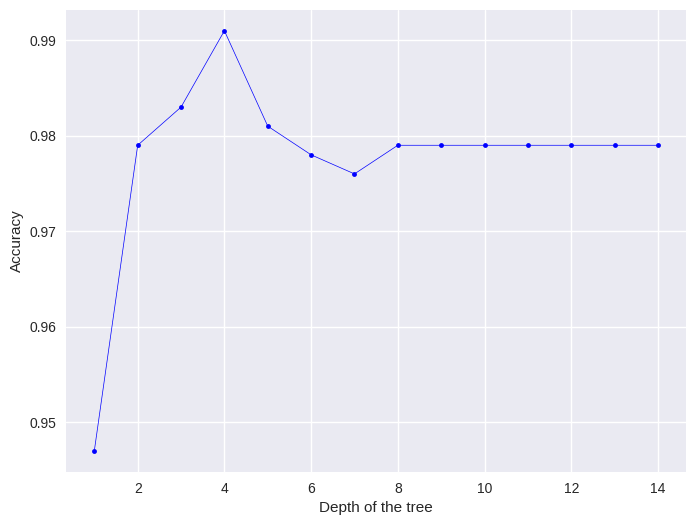

In [ ]:
plt.style.use("seaborn")
X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

plt.figure(figsize=(8,6))
fro, to = 1, 15
plt.plot(range(fro, to), [returnAccuracy((X, y), (testAr, testy), max_depth = i) for i in range(fro, to)], "b.-", linewidth=0.5)
plt.ylabel("Accuracy")
plt.xlabel("Depth of the tree")

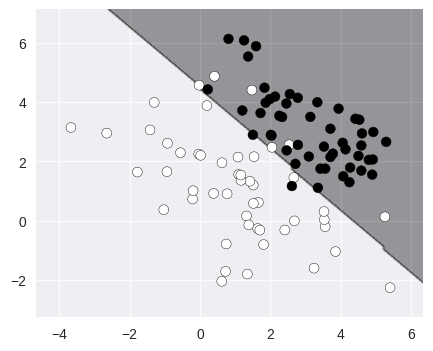

In [ ]:
X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)
  plt.show()


boundaryExp()

In [ ]:

returnAccuracySvm((X, y), (testAr, testy))

0.998

---

## Experiment on Titanic Dataset

`Reference Dataset taken from: https://www.kaggle.com/c/titanic/data`


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Our task in rest of today's lab is to use decision trees to predict if a person would be able to survive or not. 

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

In [ ]:
import os
os.system("wget https://raw.githubusercontent.com/Foundations-in-Modern-Machine-Learning/course-contents/main/Classification2/data/titanic/train.csv")

0

In [ ]:
import pandas as pd
trainDf = pd.read_csv("train.csv")

In [ ]:
for idx, row in trainDf.iterrows():
  if row["Sex"] == "female":
    trainDf.at[idx, "Sex"] = 0
  else:
    trainDf.at[idx, "Sex"] = 1
    # Since we are only exploring, lets make a validation set out of trainDf:

trainSet, testSet = train_test_split(trainDf, random_state = 0)

In [ ]:
def relevantInfo(df):
  X = df.iloc[:, [2, 4, 5, 6, 7, 9]]
  y = df.iloc[:, 1]


  #Preprocessing to handle the missing data using a regressor
  imp = IterativeImputer(max_iter = 10, random_state=0)
  imp.fit(X)
  newDf = imp.transform(X)

  return newDf , y.to_numpy()

In [ ]:
trainX, trainy = relevantInfo(trainSet)
testX, testy = relevantInfo(testSet)


Accuracy of the Random Forest on the test set: 

0.834


The confusion matrix is : 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


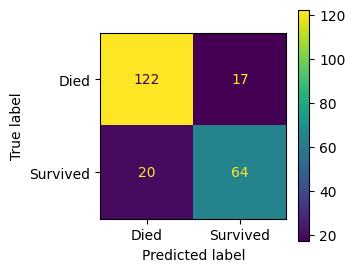

In [ ]:
plt.style.use("default")
performExperiment((trainX, trainy), (testX, testy), max_depth = 6, feature_names=[trainDf.columns[i] for i in [2, 4, 5, 6, 7, 9]], class_names=["Died", "Survived"], drawTree=False)

Text(0.5, 0, 'Depth of the tree')

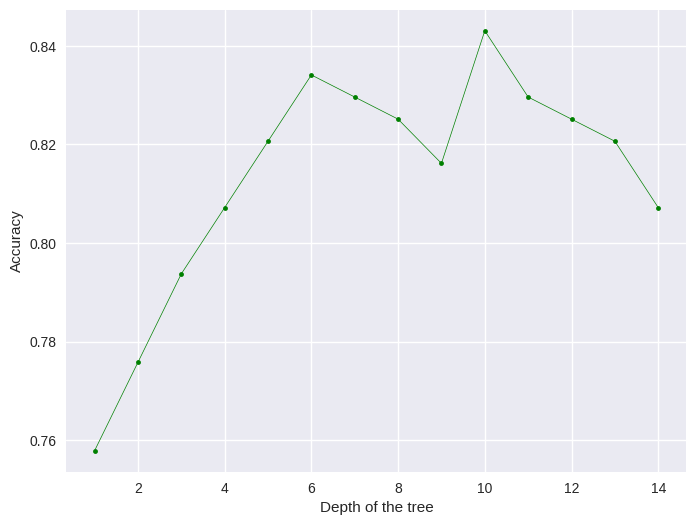

In [ ]:
plt.style.use("seaborn")
plt.figure(figsize=(8,6))
fro, to = 1, 15
plt.plot(range(fro, to), [returnAccuracy((trainX, trainy), (testX, testy), max_depth = i) for i in range(fro, to)], "g.-", linewidth=0.5)
plt.ylabel("Accuracy")
plt.xlabel("Depth of the tree")

### "Bagging of Strong Unstable Learning leads to a Strong Stable Learner." 

In [ ]:
np.random.seed(0)
testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

def stabilityTest():

  ar = np.vstack(     [\
                      np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 30, ),\
                      np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 30, )
                      ]\
                )

  X = ar
  y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))  

  treeAcc = returnAccuracyDT((X, y), (testAr, testy), max_depth = 4)
  forestAcc = returnAccuracy((X, y), (testAr, testy), max_depth = 4)

  return treeAcc,  forestAcc

treeDat = []
forestDat = []
for i in range(50):
  treeAcc, forestAcc = stabilityTest()
  treeDat.append(treeAcc)
  forestDat.append(forestAcc)


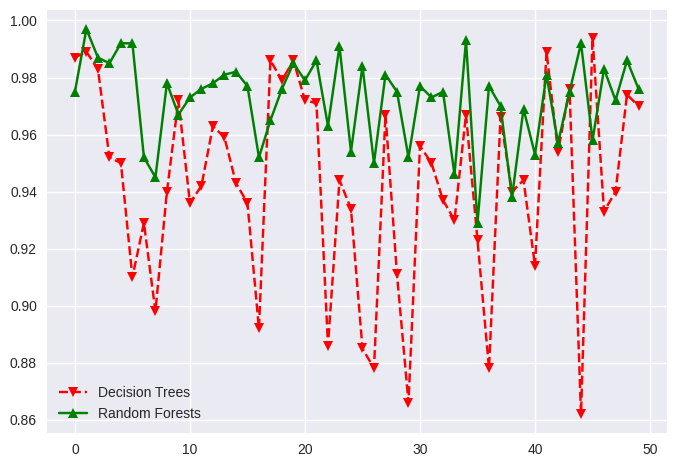

In [ ]:
plt.plot(treeDat, "rv--", label="Decision Trees")
plt.plot(forestDat, "g^-", label="Random Forests")
plt.legend()
plt.show()


# Comparing Speed of training of SVMs and Random Forests

Even though SVM's decision boundaries proved to generalize better, we, still have significant motivation to use Ensemble methods like RandomForests over SVMs for the reasons which we will see below:

Lets train a set with 20000 datapoints and train two models.

In [ ]:
ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 10000, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 10000, )
                    ]\
              )

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

In [ ]:
import time

clf = svm.SVC()
startTime = time.time()
clf.fit(X, y)
endTime = time.time()

print("Time taken for SVM: {}".format(endTime-startTime))

clf = RandomForestClassifier(n_estimators=10)
startTime = time.time()
clf.fit(X, y)
endTime = time.time()

print("Time taken for Random Forests: {}".format(endTime-startTime))

Time taken for SVM: 3.897139310836792
Time taken for Random Forests: 0.23133492469787598


---

End of Lab 3